**Задача**: Подбросим монетку 10 раз. В результате выпало 8 решек и 2 орла. Протестируйте нулевую гипотезу о том, что монета правильная, против альтернативы P(решка) > P(орел) на основании p-value. 

In [30]:
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

Рассчитаем вероятность выпадания решки при верной нулевой гипотезе (монета правильная). ``Binom.pmf`` -- Probability mass function, функция вероятности. Она возвращает вероятность того, что дискретная величина X примет определенное значение. 

Для биномиального распределения следующая формула: 

$$\frac{n!}{k!(n-k)!}*p^{^k}*(1 - p)^{n - k}$$

In [28]:
data = pd.DataFrame({'tails': [i for i in range(0, 11)], 
                    'prob': [binom.pmf(k=i, n=10, p=0.5, loc=0) for i in range(0, 11)]})

In [29]:
data

,tails,prob
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117188
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117188
8,8,0.043945
9,9,0.009766


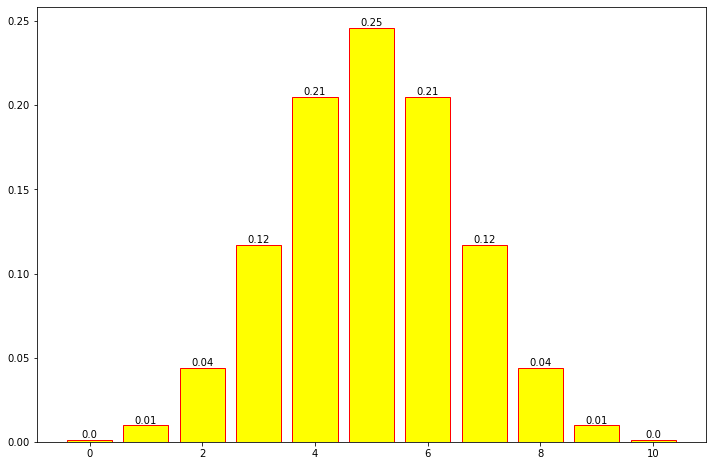

In [53]:
plt.figure(figsize=(12, 8))
plt.bar(data.tails, data.prob, color = 'yellow', edgecolor = 'red')

for i in range(len(data.prob)):
    plt.annotate(str(round(data.prob, 2)[i]), xy=(data.tails[i],data.prob[i]), 
                 ha='center', va='bottom')

plt.show()

**Pvalue** -- это вероятность получить значение статистики критерия равное наблюдаемому или более нетипичное по сравнению с наблюдаемым при условии, что нулевая гипотеза верна. Так как альтернатива правосторонняя, критическая область справа, то есть нас интересует хвост справа от наблюдаемого значения. 

In [57]:
region = []

for i in data.tails: 
    if i > 7: 
        region.append('pvalue')
    else: 
        region.append('confidence')

data['region'] = region

In [58]:
data

,tails,prob,region
0,0,0.000977,confidence
1,1,0.009766,confidence
2,2,0.043945,confidence
3,3,0.117188,confidence
4,4,0.205078,confidence
5,5,0.246094,confidence
6,6,0.205078,confidence
7,7,0.117188,confidence
8,8,0.043945,pvalue
9,9,0.009766,pvalue


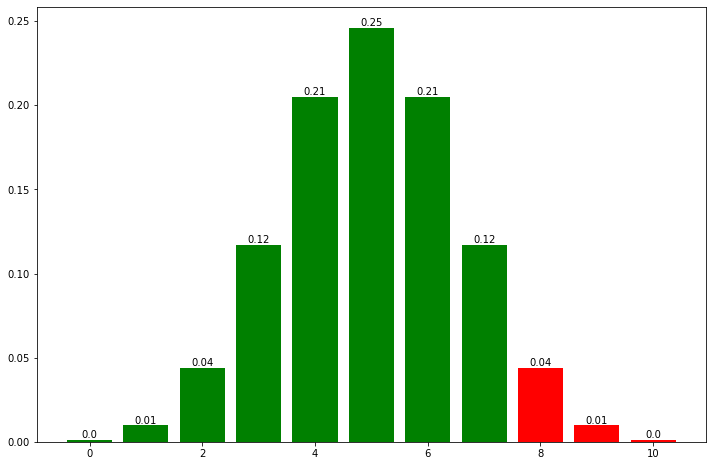

In [68]:
mask1 = data.region == 'confidence'
mask2 = data.region == 'pvalue'

plt.figure(figsize=(12, 8))
plt.bar(data.tails[mask1], data.prob[mask1], color = 'green')
plt.bar(data.tails[mask2], data.prob[mask2], color = 'red')

for i in range(len(data.prob)):
    plt.annotate(str(round(data.prob, 2)[i]), xy=(data.tails[i],data.prob[i]), 
                 ha='center', va='bottom')

plt.show()

In [69]:
pvalue = binom.pmf(8,10,0.5) + binom.pmf(9,10,0.5) + binom.pmf(10,10,0.5)

Сначала необходимо зафиксировать уровень значимости $\alpha$, то есть вероятность отвергнуть нулевую гипотезу при условии, что она верна. Следовательно, если p-value меньше фиксированного уровня значимости, то есть основания для отвержения нулевой гипотезы в пользу альтернативы, если больше -- оснований для отвержения нет.

Зафиксируем $\alpha$ на 1%. P-value > 0.01 => нет оснований для отвержения нулевой гипотезы. 

In [70]:
pvalue

0.0546875